In [1]:
import pfb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
colors=plt.get_cmap('Set2').colors # get list of RGB color values
for i in range(8):
    print(f"#{i} ",colors[i])

#0  (0.4, 0.7607843137254902, 0.6470588235294118)
#1  (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
#2  (0.5529411764705883, 0.6274509803921569, 0.796078431372549)
#3  (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
#4  (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
#5  (1.0, 0.8509803921568627, 0.1843137254901961)
#6  (0.8980392156862745, 0.7686274509803922, 0.5803921568627451)
#7  (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)


In [5]:
N=1<<20
s=np.random.randn(N)
n1=np.random.randn(N)
n2=np.random.randn(N)
s1=s+n1
s2=s+n2

In [6]:
NFRAME=2048
NTAP=4
N=NFRAME*6
frames=np.random.randn(N).reshape((-1,NFRAME))
frame_ixs=np.arange(N).reshape((-1,NFRAME))
bottom_ts,top_ts=min(frames.flatten())-0.2,max(frames.flatten())+0.2

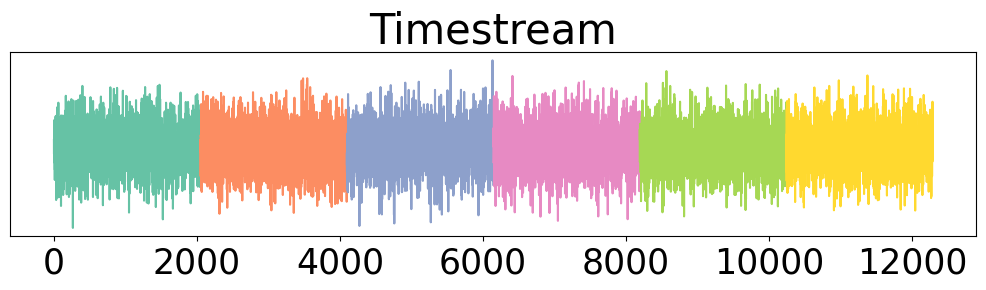

In [7]:
plt.figure(figsize=(10,3))
for i,(ixs,frame) in enumerate(zip(frame_ixs,frames)):
    plt.plot(ixs,frame,color=colors[i])
plt.yticks([])
plt.xticks(fontsize=25)
plt.title("Timestream",fontsize=30)
plt.tight_layout()
# plt.savefig("test.svg",transparent=True)
plt.show()

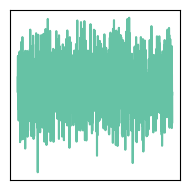

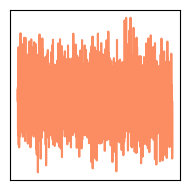

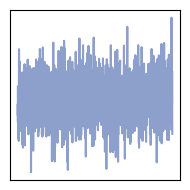

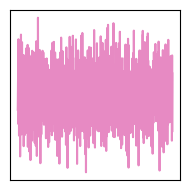

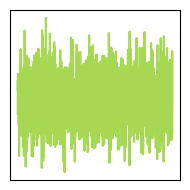

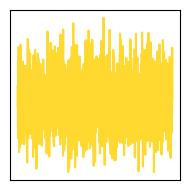

In [18]:
for ixs,frame,color in zip(frame_ixs,frames,colors[:frames.shape[0]]):
    plt.figure(figsize=(2,2))
    plt.plot(frame,color=color)
    plt.xticks([]);plt.yticks([]);plt.tight_layout();#plt.ylim((bottom_ts,top_ts))
    plt.savefig(f"./plots/multipanel_plots/ts_frame_{ixs[0]//NFRAME}.svg",transparent=True)
    plt.show()

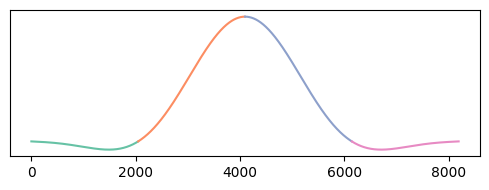

In [9]:
sinc = np.sinc(np.linspace(-NTAP/2, NTAP/2, NTAP*NFRAME))
sinc_hamm = sinc * np.hamming(NTAP*NFRAME)
sinc_hamm_segments = sinc_hamm.reshape((NTAP,NFRAME))
plt.figure(figsize=(5,2))
for ixs,color,seg in zip(frame_ixs[:NTAP,:],colors[:NTAP],sinc_hamm_segments):
    plt.plot(ixs,seg,color=color)
plt.yticks([])
plt.tight_layout()
plt.show()

### Four Segments of Sinc Hamming

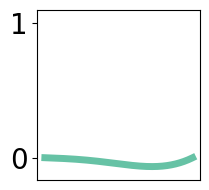

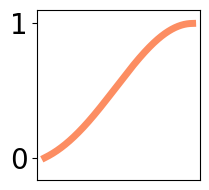

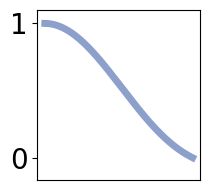

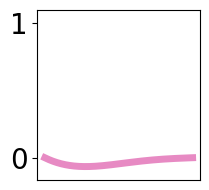

In [19]:
bottom,top = min(sinc_hamm)-0.1,max(sinc_hamm)+0.1
for ix,(seg,color) in enumerate(zip(sinc_hamm_segments,colors[:NTAP])):
    plt.figure(figsize=(2.2,2))
    plt.plot(seg,color=color,linewidth=5)
    plt.xticks([]);plt.yticks([0,1],fontsize=20);plt.ylim((bottom,top))
    plt.tight_layout();plt.savefig(f"./plots/multipanel_plots/sinc_hamm_seg_{ix}.svg",transparent=True);plt.show()

### Plot each of the products

array([0.71176471, 0.62058824, 0.64803922])

1/3


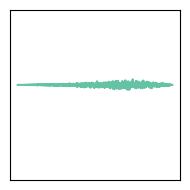

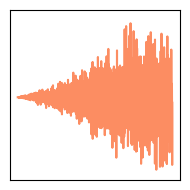

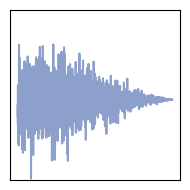

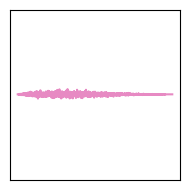

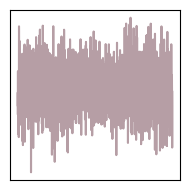

2/3


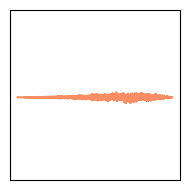

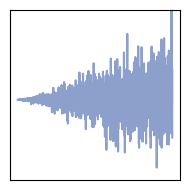

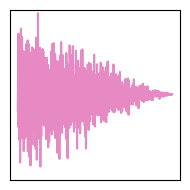

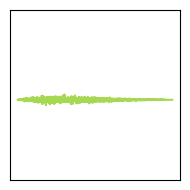

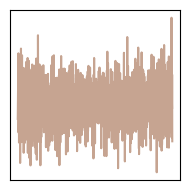

3/3


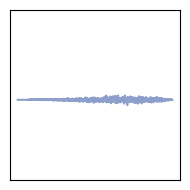

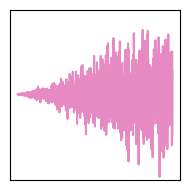

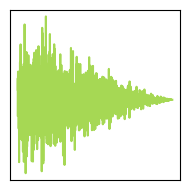

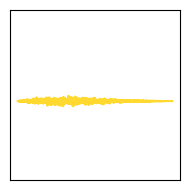

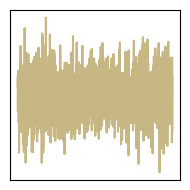

In [34]:
for i in range(3):
    print(f"{i+1}/3")
    for ixs,frame,color,seg in zip(frame_ixs[i:i+NTAP,:],frames[i:i+NTAP,:],colors[i:i+NTAP],sinc_hamm_segments):
        plt.figure(figsize=(2,2))
        plt.plot(frame*seg,color=color)
        plt.xticks([]);#plt.ylim((bottom_ts,top_ts))
        plt.yticks([]);#plt.yticks([-1,0,1])
        plt.ylim((min(frame),max(frame)))
        plt.tight_layout();
        plt.savefig(f"./plots/multipanel_plots/multiplied_{i}_{ixs[0]//NFRAME}.svg",transparent=True);
        plt.show()
    plt.figure(figsize=(2,2));plt.xticks([]);plt.yticks([]);
    plt.plot(np.sum(frames[i:i+NTAP,:]*sinc_hamm_segments,axis=0),color=np.array(colors[i:i+NTAP]).mean(axis=0))
    plt.tight_layout();
    plt.savefig(f"./plots/multipanel_plots/polyphased_{i}.svg",transparent=True)
    plt.show()
    
    